<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

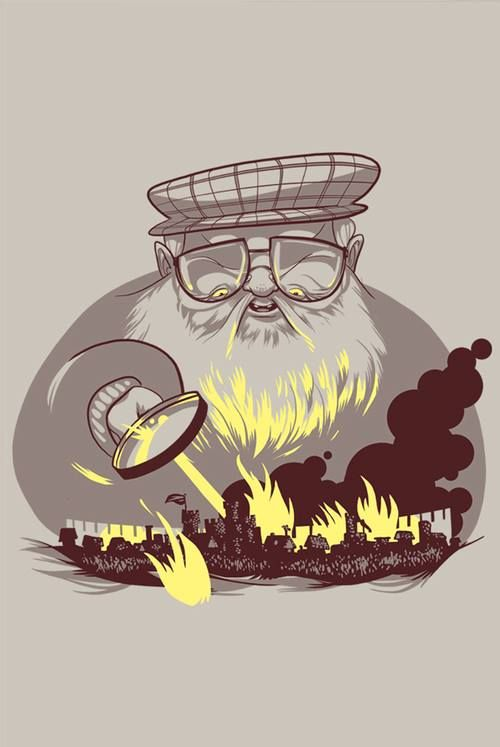

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [22]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [24]:
data = pd.read_csv("src/datasets/game_of_thrones_train.csv", index_col="S.No")

data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Asshai,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Riverlands,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,free folk,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [25]:
print(data.info())

data.drop(columns=["title", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)

print(data.info())

data.fillna({
    "dateOfBirth": data["dateOfBirth"].mean(),
    "age": data["age"].mean(),
    "culture": "Unknown",
    "house": "Unknown"
}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           494 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [26]:
# 1
data["isPopular"] = data["popularity"].apply(lambda x: 1 if x >= 0.5 else 0)

# 2
data["boolDeadRelations"] = data["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)

# 3
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Lhazareen': ['lhazareen', 'lhazarene'],
    'Vale': ['vale', 'valemen'],
    'Unknown': ['asshai']
}

def get_culture(value):
    for key, values in cult.items():
        if value.lower() in values:
            return key
    return value

data["culture"] = data["culture"].apply(get_culture)

data["culture"].unique()

array(['Asshai', 'Rivermen', 'Riverlands', 'Free Folk', 'Dornish',
       'Valyrian', 'riverman', 'Unknown', 'Ironborn', 'Northmen',
       'Summer Islands', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazareen', 'Qartheen',
       'Lysene', 'Westermen', 'Qohor', 'Westerosi', 'Norvoshi',
       'Meereenese', 'Andal', 'Astapori', 'Stormlander', 'Vale', 'Myrish',
       'Sistermen', 'Northern mountain clans', 'Crannogmen', 'Pentoshi'],
      dtype=object)

In [27]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [28]:
data.drop(columns=["popularity", "numDeadRelations", "dateOfBirth", "age"], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1557 non-null   object
 1   male               1557 non-null   int64 
 2   culture            1557 non-null   object
 3   house              1557 non-null   object
 4   book1              1557 non-null   int64 
 5   book2              1557 non-null   int64 
 6   book3              1557 non-null   int64 
 7   book4              1557 non-null   int64 
 8   book5              1557 non-null   int64 
 9   isMarried          1557 non-null   int64 
 10  isNoble            1557 non-null   int64 
 11  isAlive            1557 non-null   int64 
 12  isPopular          1557 non-null   int64 
 13  boolDeadRelations  1557 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 182.5+ KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

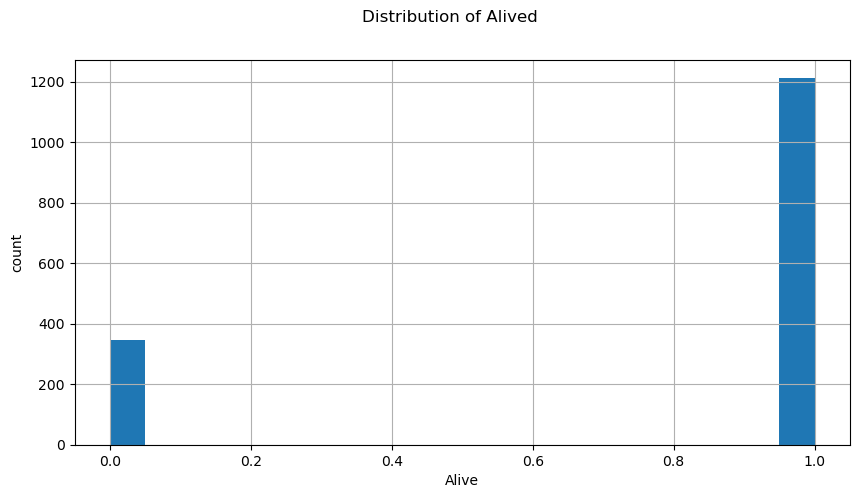

In [29]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

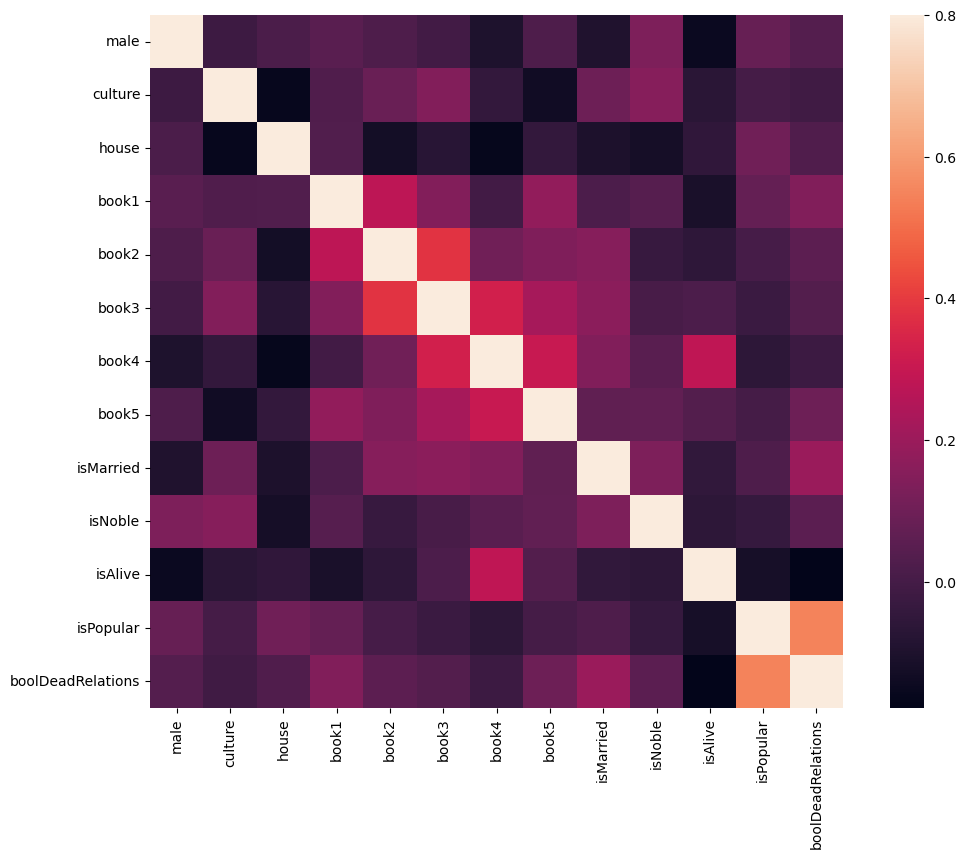

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

unprocessed_cat_features = ['culture', 'house']

for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

numerical_columns = data.drop(['name'], axis=1).columns

num_features = data[numerical_columns]

corrmat = num_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Корреляция количественных признаков с целевой переменной:
male                -0.148290
culture             -0.069694
house               -0.053308
book1               -0.112468
book2               -0.055998
book3                0.018427
book4                0.284014
book5                0.032531
isMarried           -0.049381
isNoble             -0.060572
isPopular           -0.118673
boolDeadRelations   -0.178177
dtype: float64


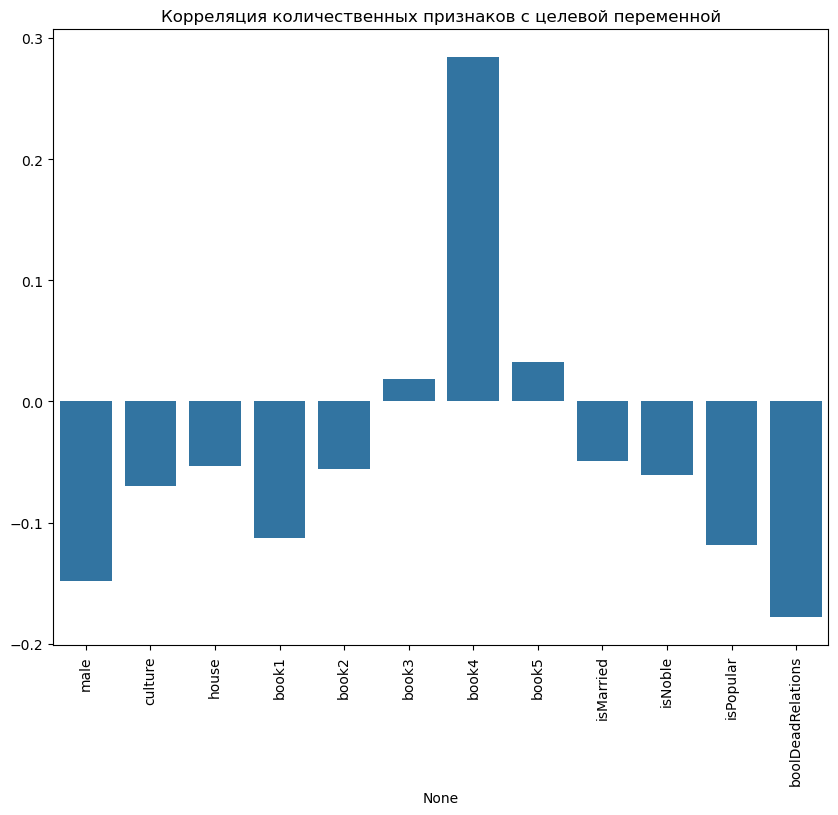

In [31]:
# Выбор количественных признаков, исключая столбец 'name'
numerical_columns = data.drop(['name', 'isAlive'], axis=1).columns
num_features = data[numerical_columns]

# Корреляционный анализ для количественных признаков
corrmat = num_features.corrwith(data['isAlive'])
print("Корреляция количественных признаков с целевой переменной:")
print(corrmat)

# Визуализация корреляции
plt.figure(figsize=(10, 8))
sns.barplot(x=corrmat.index, y=corrmat.values)
plt.xticks(rotation=90)
plt.title('Корреляция количественных признаков с целевой переменной')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [32]:
X = data.drop(columns=['name', 'isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [35]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [36]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [37]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=1000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [38]:
# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred_ada_boost = ada_boost.predict(X_test)


# RandomForest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# GaussianProcess
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gaussian_process = gaussian_process.predict(X_test)

# GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

# KNeighbors
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train, y_train)
y_pred_k_neighbors = k_neighbors.predict(X_test)

# SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# DecisionTree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

/home/paul/miniconda3/envs/StepikDLS/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [39]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [40]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [41]:
# AdaBoost
y_pred_ada_boost = ada_boost.predict(X_test)
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
print("Accuracy for AdaBoost: %.4f" % accuracy_ada_boost)

# RandomForest
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy for RandomForest: %.4f" % accuracy_random_forest)

# GaussianProcess
y_pred_gaussian_process = gaussian_process.predict(X_test)
accuracy_gaussian_process = accuracy_score(y_test, y_pred_gaussian_process)
print("Accuracy for GaussianProcess: %.4f" % accuracy_gaussian_process)

# GaussianNB
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
print("Accuracy for GaussianNB: %.4f" % accuracy_gaussian_nb)

# KNeighbors
y_pred_k_neighbors = k_neighbors.predict(X_test)
accuracy_k_neighbors = accuracy_score(y_test, y_pred_k_neighbors)
print("Accuracy for KNeighbors: %.4f" % accuracy_k_neighbors)

# SVC
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy for SVC: %.4f" % accuracy_svc)

# DecisionTree
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy for DecisionTree: %.4f" % accuracy_decision_tree)

Accuracy for AdaBoost: 0.8141
Accuracy for RandomForest: 0.7949
Accuracy for GaussianProcess: 0.7372
Accuracy for GaussianNB: 0.8077
Accuracy for KNeighbors: 0.7756
Accuracy for SVC: 0.7821
Accuracy for DecisionTree: 0.7436


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [42]:
new_data = pd.read_csv("src/datasets/game_of_thrones_test.csv", index_col="S.No")
print(new_data.info())

new_data.drop(columns=["title", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)

print(new_data.info())

new_data.fillna({
    "dateOfBirth": new_data["dateOfBirth"].mean(),
    "age": new_data["age"].mean(),
    "culture": "Unknown",
    "house": "Unknown"
}, inplace=True)

# 1
new_data["isPopular"] = new_data["popularity"].apply(lambda x: 1 if x >= 0.5 else 0)

# 2
new_data["boolDeadRelations"] = new_data["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)

def get_culture(value):
    for key, values in cult.items():
        if value.lower() in values:
            return key
    return value

new_data["culture"] = new_data["culture"].apply(get_culture)

new_data.drop(columns=["popularity", "numDeadRelations", "dateOfBirth", "age"], inplace=True)
new_data.info()

for column in unprocessed_cat_features:
    new_data[column] = label_encoding.transform(new_data[column])

X_new_test = new_data.drop(columns=['name']).values

# AdaBoost
y_pred_ada_boost = ada_boost.predict(X_new_test)

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

ValueError: y contains previously unseen labels: 'Asshai'

In [22]:
submission = pd.read_csv("src/datasets/submission.csv", index_col='S.No')

Как сохранить измененный Pandas DataFrame в csv файл:

In [23]:
submission.drop(columns=['isAlive'], inplace=True)
submission['S.No'] = submission.index
submission['isAlive'] = y_pred_ada_boost
submission.to_csv("src/outputs/new_submission.csv", index=False)